### training mode


In [49]:
import sys
from algorithm.module_list import *

In [5]:
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/news.csv"

df=pd.read_csv(url)
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,title,category
0,Alaska Oil Spill Crews Seize on Calmer Weather...,Sci/Tech
1,PeopleSoft devotees in denial?,Sci/Tech
2,Blackhawks Re-Sign Defenseman Berard,Sports
3,Pakistani Militant Farooqi had Links With Top ...,World
4,Schaub Rallies Falcons,Sports


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [7]:
nltk.download('stopwords')
STOPWORDS=stopwords.words('english')
print(STOPWORDS[:5])
porter=PorterStemmer()

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess(text,stopwords=STOPWORDS):
    text=text.lower()
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text=pattern.sub('',text)
    text=re.sub(r"\([^)]*\)", "", text)

    
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)  # separate punctuation tied to words
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()
    return text

text='Grete week for the NUSE!'
preprocess(text)

'grete week nuse'

In [9]:
# Apply to dataframe
preprocessed_df = df.copy()
preprocessed_df.title = preprocessed_df.title.apply(preprocess)

In [30]:
import collections
TRAIN_SIZE=0.7
TEST_SIZE=0.3

def Split(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
    return X_train,X_test,y_train,y_test

X=preprocessed_df['title'].values
y=preprocessed_df['category'].values

X_train,X_test,y_train,y_test=Split(X,y)

print(f"X_train: {X_train.shape}\n"
        f"X_test: {X_test.shape}-> total-val: {len(preprocessed_df.title)}\n"
        f"y_train: {y_train.shape}\n"
        f"y_test: {y_test.shape}")



X_train: (84000,)
X_test: (36000,)-> total-val: 120000
y_train: (84000,)
y_test: (36000,)


####  Label encoding


In [62]:
from sklearn.preprocessing import LabelEncoder
CLASS_NUM=len(np.unique(y_train))
label_encoding1=OneHotEncoder().fit(y_train.reshape(-1,1))
label_encoding2=LabelEncoder().fit(y_train)

CLASS_LIST=list(label_encoding2.classes_)
y_train_enc=label_encoding2.transform(y_train)

In [45]:
del LabelEncoder

In [21]:
from candlestick import candlestick
import pandas as pd
path=f'cryptoData/'
df=pd.read_csv(f'{path}BNB-USD.csv',parse_dates=True)
# df['result']= candlestick.inverted_hammer(df)
# print(df)
z= candlestick.hammer(df,ohlc=["Open", "High", "Low", "Close"],target='result')
z
# z['result_check']=z['result'].astype("category").cat.codes
# z = z[z['result_check'] != -1]

# z['result'].value_counts()
# z['result'].map(dict('True'=1, 'False'=0))
# type(z['result'][1])


,Date,Open,High,Low,Close,Adj Close,Volume,result
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,False
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,False
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,False
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,False
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,False
...,...,...,...,...,...,...,...,...
1843,2022-11-26,300.571747,316.962128,300.389465,311.388458,311.388458,1221554861,False
1844,2022-11-27,311.372040,316.219879,307.156372,307.429291,307.429291,793779029,False
1845,2022-11-28,307.399567,309.096100,289.493683,293.527252,293.527252,1154829072,False
1846,2022-11-29,293.491821,304.822815,289.763641,295.498169,295.498169,986451640,False


In [209]:
import plotly.graph_objects as go
from candlestick import candlestick
import pandas as pd
import matplotlib.pyplot as plt

# Define the Data
path=f'cryptoData/'
df=pd.read_csv(f'{path}SOL-USD.csv',parse_dates=True)

# Result of the bearish_engulfing candle
z= candlestick.dragonfly_doji(df,ohlc=["Open", "High", "Low", "Close"],target='result')
z['result_check']=z['result'].astype("category").cat.codes
z = z[z['result_check'] != -1]

# Create the candlestick chart
def plot(df,windows):

    fig = go.Figure(data=[go.Candlestick(x=df.loc[:,'Date'],
                  open=df.loc[:,'Open'], high=df.loc[:,'High'],low=df.loc[:,'Low'], close=df.loc[:,'Close'])])

    # fig.add_trace(go.Scatter(x=z.loc[windows:,'Date'], y=z.loc[windows:,'result_check'], name="linear",line_shape='linear'))

    fig.add_trace(go.Scatter(x=df.loc[windows:,'Date'], y=df.loc[windows:,'Close'],mode='markers',
                        marker=dict(size=8, color=[ 'green' if i ==1  else 'red' for i in df.loc[windows:,'result_check']], showscale=True)))
    
    fig.update_layout(width=1500, height=600)
    fig.update_layout(xaxis_rangeslider_visible=False)

    fig.show()

# Show the chart
# show all the postive signal
b=z[z['result_check'] != 0]
df=b
plot(df,0)


In [211]:
b=z[z['result_check']]

b


In [254]:
a = np.random.choice([0, 1], size=10, p=[0.5, 0.5])
X = np.random.rand(10)
def counter():
    a_plus=[]
    box=[]
    for index,z in enumerate(a):
        if z ==1:  
            box.append(0)
            if len(box) <2:
                first_index=index
            
            elif len(box) >1:                
                last_index=index
                box.clear()
                a_plus.append(X[first_index:last_index+1])
                a_plus.append('hii')
    
    return a_plus
a_plus=counter()
a_plus


[array([0.74031735, 0.00676971, 0.69500644, 0.2014405 , 0.79268602]), 'hii']

In [788]:
df=pd.read_csv('btc_2021.csv')
df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

df
# # Create empty columns for buy and sell signals
# data["Buy"] = None
# df["Sell"] = None

# # Fill in buy and sell columns
# for i in range(len(df)):
#     if i > 0:
#         if df.at[i, "MACD_12_26_9"] > df.at[i, "MACDs_12_26_9"] and df.at[i-1, "MACD_12_26_9"] < df.at[i-1, "MACDs_12_26_9"] :
#             df.at[i, "Buy"] =1
#         elif df.at[i, "MACD_12_26_9"] <df.at[i, "MACDs_12_26_9"] and df.at[i-1, "MACD_12_26_9"] > df.at[i-1, "MACDs_12_26_9"]:
#             df.at[i, "Sell"] = 0



C:\Users\Erfan\AppData\Local\Temp\ipykernel_12848\133176264.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



,Date,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,2021-08-18,44686.750000,45952.062500,44364.027344,44801.187500,44801.187500,32194123075,NaN,NaN,NaN
1,2021-08-19,44741.882813,46970.761719,43998.316406,46717.578125,46717.578125,37204312299,NaN,NaN,NaN
2,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,NaN,NaN,NaN
3,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188,48905.492188,40585205312,NaN,NaN,NaN
4,2021-08-22,48869.105469,49471.609375,48199.941406,49321.652344,49321.652344,25370975378,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
510,2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949,55.648513,90.048948,-34.400435
511,2023-01-11,17446.359375,17934.896484,17337.994141,17934.896484,17934.896484,18372283782,127.242826,129.314609,-2.071782
512,2023-01-12,18117.593750,19030.087891,17995.203125,18869.587891,18869.587891,34971338710,256.447454,206.815389,49.632065
513,2023-01-13,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,29225029694,437.715545,310.466784,127.248761


In [754]:
signal_macd

In [1]:
# cc=(df.loc[2:20,['Open','High','Low','Close','Adj Close','Volume']]).values

label=torch.tensor(label)
X_list = [torch.tensor(x) for x in X_list]
X_list,label


NameError: name 'torch' is not defined

In [6]:
#candlsitk chart pattern
from  Project_01.candlstick import ca
data=ca.candstick(data='BTC-USD')

# Macd signal with label
from Project_01.macd import macd
X,y=macd.signal_macd()




a:\python_file\Project\macd.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df=self.data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)


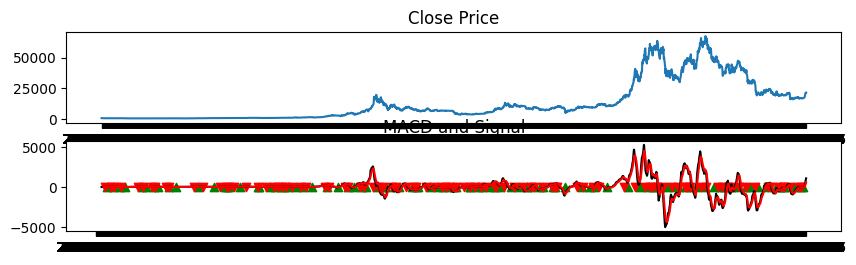

In [4]:


# X['Close'].value_counts()
# X['doji_start'].value_counts()



[array([[3.39458008e+02, 3.52966003e+02, 3.38424011e+02, 3.49290009e+02,
         3.49290009e+02, 1.87970000e+07],
        [3.49817993e+02, 3.52731995e+02, 3.41776001e+02, 3.42415009e+02,
         3.42415009e+02, 1.68342000e+07],
        [3.42153992e+02, 3.47032013e+02, 3.42153992e+02, 3.45488007e+02,
         3.45488007e+02, 8.53547000e+06],
        [3.45376007e+02, 3.63626007e+02, 3.44255005e+02, 3.63264008e+02,
         3.63264008e+02, 2.42056000e+07],
        [3.62265015e+02, 3.74816010e+02, 3.57561005e+02, 3.66924011e+02,
         3.66924011e+02, 3.04501000e+07],
        [3.65856995e+02, 3.71309998e+02, 3.63734985e+02, 3.67695007e+02,
         3.67695007e+02, 1.58389000e+07],
        [3.67984985e+02, 4.29717987e+02, 3.67984985e+02, 4.23561005e+02,
         4.23561005e+02, 4.57832000e+07],
        [4.27273010e+02, 4.57092987e+02, 4.01122986e+02, 4.20734985e+02,
         4.20734985e+02, 5.89450000e+07],
        [4.18416992e+02, 4.19252014e+02, 3.84789001e+02, 3.97817993e+02,
       

In [378]:
import torch
from  torchvision import  transforms
from torch.utils.data import TensorDataset, DataLoader

# Define the normalization transform
normalize2 = transforms.Normalize(mean=[0.5, 0.5, 0.5,0.6], std=[0.5, 0.5, 0.5,0.5]) # 3 Channel
normalize = transforms.Normalize(mean=[0.5], std=[0.5]) # it is working on all chanel, if goes further we must check it with the channell of our xtrain
# Create a dataset object
data=torch.rand(100,2,20,20)
# normalize(data)


In [ ]:
data[0]


In [376]:
import torch
import torch.nn.functional as F

# Define the categorical variable
categorical_variable = torch.tensor([0, 1, 2, 3, 4, 5])

# One-hot encode the categorical variable
one_hot = F.one_hot(categorical_variable, num_classes=9)
one_hot

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [272]:

handler = TA_Handler(
symbol="BTCUSDT",
exchange="COINEX",
screener="crypto",
# valid  interval: (ex: 1m, 5m, 15m, 1h, 4h, 1d, 1W, 1M)
interval="1d",timeout=None)

analysis = handler.get_analysis()
Rsi=analysis.indicators["RSI"]
Macd_slow=analysis.indicators["MACD.macd"]
Macd_fast=analysis.indicators["MACD.signal"]
Open=analysis.indicators["open"]
High=analysis.indicators["high"]
Low=analysis.indicators["low"]
Close=analysis.indicators["close"]
change=analysis.indicators["change"]
a=analysis.exchange
data=np.array([a])

        # Dataframe Data
data=pd.DataFrame([data],columns=['Exchange'])
data

,Exchange
0,COINEX


In [14]:
from api_tra import obj
data=obj.yfdownlaod(interval='1d',period='max',symbol='BTC-USD')

  hint ->
 Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max 
 Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo 
[*********************100%***********************]  1 of 1 completed
data has been save to BTC-USD.csv in current path


In [46]:
import pandas_ta as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch


# Calculate MACD
class MACD():
    def __init__(self):
        super(MACD, self).__init__()

        # Importing Data
        self.data=pd.read_csv('BTC-USD.csv') # Data

        # Macd signal
        self.buy_macd=[]
        self.buy_macd_label=[]

        self.sell_macd=[]
        self.sel_macd_label=[]

        # Stoch signal
        self.buy_stoch=[]
        self.buy_stoch_label=[]
        
        self.sell_stoch=[]
        self.sell_sotch_lable=[]

        self.X_list=[]
        self.label=[]

    def signal_macd(self):
        # Calculate MACD values using the pandas_ta library
    
        df=pd.read_csv('BTC-USD.csv')
        df=self.data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
        
        # Create empty columns for buy and sell signals
        
        
        
        # Fill in buy and sell columns
        for i in range(len(self.data)):
            if i > 0:
                if self.data.at[i, "MACD_12_26_9"] > self.data.at[i, "MACDs_12_26_9"] and self.data.at[i-1, "MACD_12_26_9"] < self.data.at[i-1, "MACDs_12_26_9"]:
                    self.data.at[i, "Buy"] =1
                elif self.data.at[i, "MACD_12_26_9"] < self.data.at[i, "MACDs_12_26_9"] and self.data.at[i-1, "MACD_12_26_9"] > self.data.at[i-1, "MACDs_12_26_9"]:
                    self.data.at[i, "Sell"] = 0

        
        box=[]
        # self.data["Buy"] = None
        # self.data["Sell"] = None

    
        for index,z in enumerate(self.data['Buy']):
            if z ==1:  
                box.append(0)
                if len(box) <2:
                    first_index=index
                
                elif len(box) >1:                
                    last_index=index
                    box.clear()
                    self.X_list.append((self.data.loc[first_index:last_index+1,
                                        ['Open','High','Low','Close','Adj Close','Volume']]).values )
                    self.label.append(1)

            

        
        # plt.figure(figsize=(10, 4)) 
        # ax1 = plt.subplot(3, 1, 1)
        # plt.plot(self.data.Date, self.data.Close)
        # ax1.set_title('Close Price')

        # ax2 = plt.subplot(3, 1, 2)
        # plt.plot(self.data.Date, self.data['MACD_12_26_9'], c='black')
        # plt.plot(self.data.Date, self.data['MACDs_12_26_9'], c='red')
        # plt.scatter(np.arange(len(self.data)),self.data.Buy,marker='^',c='green')
        # plt.scatter(np.arange(len(self.data)),self.data.Sell,marker='v',c='red')
        # ax2.set_title('MACD and Signal')
        # plt.show()

        return self.X_list,np.array(self.label)

obj=MACD()
X,y=obj.signal_macd()

C:\Users\Erfan\AppData\Local\Temp\ipykernel_6284\821494499.py:38: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df=self.data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)


In [69]:
# for index, i in enumerate( range(len(X))):
#     print(index,X[i].shape)

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

^C
